<img src="./pictures/logo-insa.png" style="float:right; max-width: 60px; display: inline" alt="INSA" /></a>

# Annex A - AC motor and inverter modeling
 
*Written by Yann Bocquet, INSA Toulouse, France*
   


### 1. AC Motor Model
The electrical model of the 3 phases motor is shown below. For each phase we have $\underline{V} = \underline{E} + jX\underline{I} + R\underline{I}$ with $\underline{E}=k_{v}\Omega$ and $X=L\omega$ the EMF and the reactance of one phase ($k_v$, $R$ and $L$ are the speed constant, resistance and inductance of one phase while $\omega$ is the electrical speed).  <br>
If we now replace the total inductance effect by a direct and a transversal inductance effects, we get : $\underline{V} = \underline{E} + jX_d\underline{I_d} + jX_q\underline{I_q} + R\underline{I}$ with $I=\sqrt{I_d^2+I_q^2}$, $I_d=Isin(\psi)$, $I_q=Icos(\psi)$, $X_q=L_q\omega$ and $X_d=L_d\omega$ ($\psi$ is the phase shift between the EMF and the current). The Fresnel representation of this model is shown below. 

With this model, if we assume that the current vary sinusoidally, we get $C_m=\frac{3}{2}k_vIcos(\psi)=\frac{3}{2}k_vI_q$.

>[1] *Marc Derumaux. [Modelisation des moteurs brushless](https://eduscol.education.fr/sti/sites/eduscol.education.fr.sti/files/ressources/pedagogiques/9005/9005-moteurs-brushless-v3.pdf)* <br>
>[2] *Bernard Multon. [Les machines synchrones autopilotées](https://cel.archives-ouvertes.fr/cel-01249633/document)*

<img src="AA/Electric_model.JPG" width="600">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;">[2] Electrical model of the motor (Ref1)</span></div>

<img src="AA/Fresnel.JPG" width="400">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;">[3] Fresnel representation of one phase (Ref2)</span></div>

###### 1.1 Motor Control
The motor selected uses fieldweakening which means that once the velocity of the motor is limited by the supply voltage (called base speed $\Omega_b$), the control of the motor is changed in order to exceed this speed. This strategy implies however the decrease of the torque available. These characteristics can be seen on the graphs below.<br>
For brushless motors, fieldweakening is done by increasing $\psi$, which increases $I_d=Isin(\psi)$ ($I_d$ negative), which in turn allows to keep constant the amplitude of $V$ while $E$ increases. An illustration is given below.

In our case, the motor is controlled such that the torque available $C_m=\frac{3}{2}k_vIcos(\psi)$ is maximum when $\Omega<\Omega_b$. This is done by setting $\psi=0$ which implies $I_d=Isin(\psi)=0$ and $I_q=Icos(\psi)=I$. In this case the brushless motor behaves as a DC motor with different torque and speed constants : $k_T=\frac{3}{2}k_v$. <br> 
Once $\Omega>\Omega_b$, we want $V$ to remain constant equal to $\frac{U_{DC}}{\sqrt{3}}$ which is the maximum voltage available at the output of the inverter. From the illustration below, we can write the following equation : $V^2=(E-X_dI_d)^2+(XqIq)^2$ (The resistance is neglected as we are only considering high velocities). Thus for $\Omega>\Omega_b$ we want $I_d$ and $I_q$ such that:  
$(\frac{U_{DC}}{\sqrt{3}})^2=(E-X_dI_d)^2+(XqIq)^2$ with $E=k_v\Omega$  
or  
$(\frac{U_{DC}}{2})^2=(E-X_dI_d)^2+(XqIq)^2$ with $E=k_v\Omega$
depending of the PWM type.

<img src="AA/Torque-Speed.JPG" width="600">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1em;">[4] Parvex HKW242_225DAB motor characteristics</span></div>

<img src="AA/Fresnel_Fieldweakening.JPG" width="400">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1em;">[5] Fresnel representation with and without fieldweakening</span></div>

###### 1.2 Modelica Model and Equations 
The modelica model of the motor is shown below. <br>

The calculation steps for the backward simulation are the following ones:
- The torque $C_m$ and the velocity $\Omega$ are computed from the mission profiles <br>
- The transversal current is computed from the required torque : $I_q=\frac{C_m}{1.5k_T}$
- The EMF and the electric velocity $\omega$ are computed from the required angular velocity $\Omega$ : $E=k_v\Omega$ and $\omega=N_{poles}\Omega$ <br>
- The direct current is computed depending on the velocity : <br>
    $\rightarrow$ Case $\Omega<\Omega_b$ : $\psi=0$ $\Longrightarrow$ $I_d=Isin(\psi)=0$ <br>

    $\rightarrow$ Case $\Omega>\Omega_b$ : $I_d$ solution of : $(\frac{U_{DC}}{2})^2=(E-X_dI_d)^2+(XqIq)^2$ (It implies $V\approx\frac{U_{DC}}{2}$) 
- The output voltage of the inverter is computed using the equation : $\underline{V} = \underline{E} + jL_q\omega\underline{I_q} + jL_d\omega\underline{I_d} + R\underline{I}$ with  $I=\sqrt{I_d^2+I_q^2}$
- The Joule losses of the motor are computed from the current in the motor: $P_J=\frac{3}{2}\frac{R_{pp}I^2}{2}$ 

> *$L=\frac{L_{pp}}{2}$ and $R=\frac{R_{pp}}{2}$ with $L_{pp}$ and $R_{pp}$ the phase to phase inductance and resistance given in the datasheet. <br>
It is important to note that all calculations are done using peak values.*

The upper limit of the torque limiter vary as a function of the velocity and follows the curve Torque-Speed presented previously. To compute the maximum torque available, we assume the power constant equal to 101kW, which is quite true if we look at the Power-Speed curve presented previously. The Modelica code of the torque limiter is given below. 

<img src="AA/AC_PM_Motor.svg" width="600">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;">[6] Modelica model of the BLDC Motor</span></div>

> #### *Code Mechanical to Electrical component :*

> equation <br>
  Connections.root(pp.reference);     //This is the root for reference.gamma <br>
  Connections.branch(pp.reference, np.reference);    //non-breakable branch <br>
  pp.reference.gamma = np.reference.gamma;    //it doesn't change the angle <br>
  
>/* Input */ <br>
  Omega = der(flange.phi); <br>
  Torque = -flange.tau; <br>
  
>/* define standard two port component */ <br>
  u = pp.v - np.v; <br>
  i = pp.i; <br>
  pp.i + np.i = Complex(0); <br>
   
>/* Compute E */ <br>
  E = Kv * Omega; <br>
  
>/* Compute Iq */ <br>
  Torque = 1.5 * Kv * Iq; <br>
  
>/* Compute omega */ <br>
  omega = Npoles * Omega; <br>
  
>/* Compute Id */ <br>
  if OverSpeed then <br>
    (Vdc / 2) ^ 2 = (E - Ld * omega * Id) ^ 2 + (Lq * omega * Iq) ^ 2; <br>
  else <br>
    Id = 0; <br>
  end if; <br>
  
>/* Compute I */ <br>
  I = sqrt(Id ^ 2 + Iq ^ 2); <br>
  
>/* Compute Psi */ <br>
//Division by 0 <br>
  if I == 0 then <br>
    Psi = 0; <br>
  else <br>
    Psi = Modelica.Math.asin(Id / I); <br>
  end if; <br>
  
>/* Output */ <br>
  u.re = 0; <br>
  u.im = E; <br>
  i.re = -Id; <br>
  i.im = Iq; <br>
  der(pp.reference.gamma) = omega; <br>
equation

<br>
<br>

> #### *Code Torque limiter :*

>equation <br>
  LimitLow = -260; <br>
  if OverSpeed then <br>
    LimitHigh = P / Omega; <br>
  else <br>
    LimitHigh = 260; <br>
  end if;

###### 1.3 Parameters 
As already seen during the modelling of the DC motor : $k_v=\frac{E_{RMSpp}\sqrt{2}}{\Omega\sqrt{3}}$ <br>
From $k_v$ we can easily compute $k_T=\frac{3}{2}k_v$. <br>
The thermal parameters of the AC motor are the same as those used for the DC motor.

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
π = m.pi

###Characteristics AC Motor HKW242_225DAB Parvex
#Mechanical
Ps1    =  101000 #[k] power
Mo     =  260    #[N.m] low speed torque
Nb     =  3710   #[rpm] base speed (speed at which deflux starts)
Nmax   =  13000  #[rpm] max speed
M      =  70     #[kg] motor mass
J      =  0.105  #[kg.m²] rotor inertia
Nppoles = 4      #[]    number of pole pairs
#Electrical
Udc    =  540    #[V] DC voltage 
Io     =  206    #[Arms] low speed current
Rb     =  0.0424 #[Ω] resistance phase to phase
Ld_pp  =  0.00116 #[H]   direct inductance (phase-phase)
Lq_pp  =  0.00115 #[H]   transverse inductance (phase-phase)
#Thermal
Tth    =  4      #[min] thermal time constant 
Tcool  =  25     #[°C] coolant temperature

#To compute the EMF constant
E      =  81.5   #[Vrms] 
Nemf   =  1000   #[rpm]  

#Parameters computed in "03_Traction_Chain_Modelling"
Rwheel = 0.356   #[m] wheel radius
N      = 13.42   #[] reduction ratio    

In [3]:
###Parameters Brushless Motor Model
R   = Rb/2                                   #[Ω] resistance of one phase
Ld  = Ld_pp/2                                #[H] direct inductance of one phase
Lq  = Lq_pp/2                                #[H] transverse inductance of one phase
kv  = E*m.sqrt(2)*60/(m.sqrt(3)*Nemf*2*π)    #[V.s] speed constant
kt  = 3/2*kv                                 #[N.m/A] torque constant
Pth = 3/2*Rb*Io**2                           #[W] Joule losses
Rth = 80/Pth                                 #[K/W] thermal resistance
Cth = Tth*60/Rth                             #[J/K] heat capacity

t = "          "
print("R = %0.4f Ω" %R +t+ "kv = %0.4f Nm/A" %kv +t+ "kt = %0.4f Nm/A" %kt +t+ "Ld = %0.5f H" %Ld +t+ "Lq = %0.5f H" %Lq)
print("Rth = %0.4f K/W" %Rth +t+ "Cth = %0.2f J/K" %Cth +t+ "J = %0.3f kg.m²" %J +t+ "Nppoles = %0.0f" %Nppoles)

R = 0.0212 Ω          kv = 0.6355 Nm/A          kt = 0.9532 Nm/A          Ld = 0.00058 H          Lq = 0.00057 H
Rth = 0.0296 K/W          Cth = 8096.79 J/K          J = 0.105 kg.m²          Nppoles = 4


##### 1.4 Tests and Validation 
A test is conducted with both Modelica and Python. The current and voltage of the motor as well as $\phi$ and $\psi$ are computed as a function of the velocity of the motor under load. Both studies give the same results. The Python study is presented below. 

Text(0, 0.5, 'φ (°)')

<Figure size 432x288 with 0 Axes>

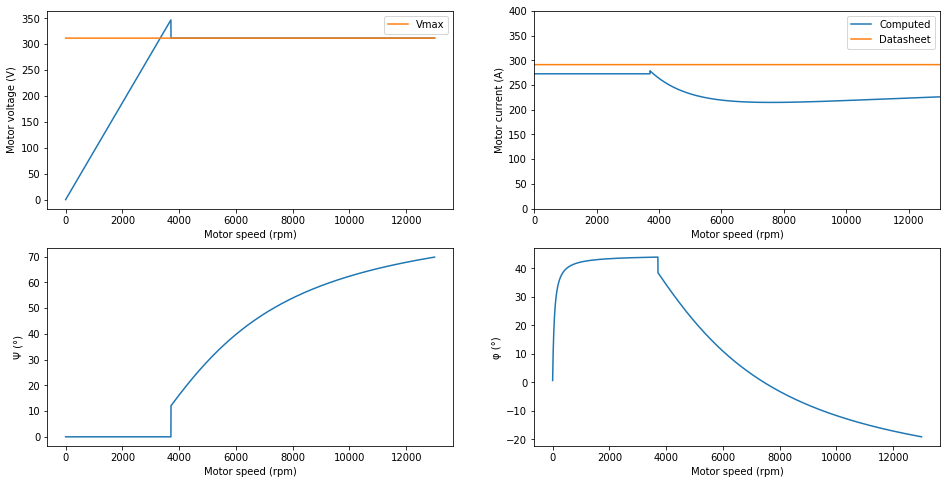

In [5]:
###Plot Ψ=f(Ω) for Cm=Cmax 

list_Ωrpm  = np.linspace(1, Nmax, 13001)  #[rpm] motor speed
Ωb     = Nb     #[rpm] base speed
P      = Ps1    #[W] motor power (assumed constant)
list_V = []
list_I = []
list_Ψ = []
list_Ψdeg = []
list_φ = []
list_φdeg = []

for Ωrpm in list_Ωrpm :
    Ω     = Ωrpm*2*π/60         #[rad/s] motor speed  
    E     = kv*Ω                #[V] fem
    welec = Nppoles*Ω           #[rad/s] electrical speed 
    
    if Ωrpm < Ωb :  #--> no fieldweakening
        Cm   = Mo               #[Nm] torque
        Iq   = Cm/kt            #[A] transverse current
        Id   = 0                #[A] direct current
    else :          #--> fieldweakening
        Cm   = P/Ω              #[Nm] torque
        Iq   = Cm/kt            #[A] transverse current
        if (Udc/m.sqrt(3))**2 > (Lq*welec*Iq)**2 :
            Id   = (E - m.sqrt((Udc/m.sqrt(3))**2-(Lq*welec*Iq)**2))/(Ld*welec)  #[A] direct current
        else : 
            print("Impossible to verify (Vdc/2)² = (E - Ld.welec.Id)² + (Lq.welec.Iq)² from Ω = %0.0f rpm" %Ωrpm)
            break
    
    Xd = Ld*welec             #[H/s] direct reactance
    Xq = Lq*welec             #[H/s] transverse reactance
    
    #Compute I
    I = m.sqrt(Id**2+Iq**2)  #[A] motor current
    list_I.append(I)
    
    #Compute Ψ and φ
    argI  = m.atan(Id/Iq)    #[rad] current phase 
    argE  = 0                #[rad] fem phase 
    argV  = m.atan(Xq*Iq/(E+R*I-Xd*Id))    #[rad] motor voltage phase --> RI non negligeable for low speeds
    Ψ     = argI - argE      #[rad] phase shift between I and E
    Ψdeg  = Ψ*(180/π)        #[°] 
    φ     = argV - argI      #[rad] phase shift between I and U
    φdeg  = φ*(180/π)        #[°]
    list_Ψ.append(Ψ) 
    list_Ψdeg.append(Ψdeg) 
    list_φ.append(φ)
    list_φdeg.append(φdeg)
    
    #Compute V
    V = m.sqrt((E-Xd*Id)**2+(Xq*Iq)**2)     #[V] motor voltage --> RI neglected
    list_V.append(V)
    
    
#Plot
Vdata = Udc/m.sqrt(3)              #[V] max motor voltage - datasheet
list_Vdata = [Vdata for i in list_Ωrpm]
Idata = Io*m.sqrt(2)               #[A] max motor current - datasheet
list_Idata = [Idata for i in list_Ωrpm]

plt.figure()
plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.plot(list_Ωrpm[:len(list_V)], list_V)
plt.plot(list_Ωrpm[:len(list_V)], list_Vdata, label="Vmax")
plt.xlabel("Motor speed (rpm)")
plt.ylabel("Motor voltage (V)")
plt.legend() 

plt.subplot(222)
plt.plot(list_Ωrpm[:len(list_I)], list_I, label="Computed")
plt.plot(list_Ωrpm[:len(list_I)], list_Idata, label="Datasheet")
plt.xlabel("Motor speed (rpm)")
plt.ylabel("Motor current (A)")
plt.axis([0, Nmax, 0, 400])
plt.legend() 

plt.subplot(223)
plt.plot(list_Ωrpm[:len(list_Ψdeg)], list_Ψdeg)
plt.xlabel("Motor speed (rpm)")
plt.ylabel("Ψ (°)")

plt.subplot(224)
plt.plot(list_Ωrpm[:len(list_φdeg)], list_φdeg)
plt.xlabel("Motor speed (rpm)")
plt.ylabel("φ (°)")
      


##### 1.5 Model Limits
As we can see on the graph above :
- With the speed constant computed $k_v$ and the formula $C_m=\frac{3}{2}k_vIcos(\psi)$ that links $I$ to $C_m$, we don't find the current given in the datasheet for the maximum torque. <br>
- With the inductances given in the datasheet, the motor is not able to reach the base speed without fieldweakening. Moreover the current exceeds the maximum value allowed. The reason may be that the inductances given have been measured without load, and therefore would be smaller for high current. 
- We have a discontinuity when fieldweakening starts

### 2. Inverter Model

##### 2.1 Modelica Model and Equations
The modelica model of the inverter is shown below. <br>
The power losses are computed using the formulas developped by JF.Roche and presented below. To compute the commutation losses in the diode, we use another formula given in Reference 3 with a slight modification : $P_{diode_{com}}=\frac{fQ_{rr}V_{DC}I}{4\pi I_{Ref}}$. This formula allows to use $Qrr$ instead of $E_{Rec}$ that is not given in the datasheet.

In the formulas, M is the modulation index defined as : $M=\frac{\sqrt{3}V}{V_{DC}}$

> [3] *Jean-François ROCHE. [Definition d'un dissipateur thermique en milieu industriel](https://www-techniques-ingenieur-fr.gorgone.univ-toulouse.fr/base-documentaire/42245210-composants-actifs-en-electronique-de-puissance/download/d3117/definition-d-un-dissipateur-thermique-en-milieu-industriel.html)* <br>
> [4] *Joseph FABRE. [Etude et mise en oeuvre de modules de puissance MOSFET SiC pour leurs futures utilisations dans les convertisseurs ferroviaires](https://oatao.univ-toulouse.fr/16615/8/fabre_partie_2_sur_2.pdf)* (Appendix X)

<img src="./05/InverterAC_QS.svg" width="700">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;">[7] Inverter</span></div>

### Code Inverter : 

equation <br>
// DC Voltage and current <br>
  Vdc = p_DCbus.v - n_DCbus.v; <br>
  0 = p_DCbus.i + n_DCbus.i; <br>
  Idc = p_DCbus.i; <br>
  
// Powers <br>
  P_DC = Vdc * Idc; <br>
  P_AC = 3 / 2 * V * I * cosPHI; <br>
  P_DC = P_AC + P_6IGBT + P_6Diode; <br>
  
// Thermic flow <br>
  P_6IGBT + heatPort_IGBT.Q_flow = 0; <br>
  P_6Diode + heatPort_Diode.Q_flow = 0; <br>
  
//Output port <br>
  mOut = m; <br>
  ImaxOut = I; <br>
  cosPhiOut = cosPHI; <br>
  
algorithm <br>
// Motor current and voltage <br>
  I := sqrt(2) * sqrt(pp.i.re ^ 2 + pp.i.im ^ 2); <br>
  V := sqrt(2) * sqrt(pp.v.re ^ 2 + pp.v.im ^ 2); <br>
  cosPHI := cos(Modelica.Math.atan2(ACsense.U_im, ACsense.U_re) - Modelica.Math.atan2(ACsense.I_im, ACsense.I_re) - Modelica.Constants.pi); <br>

-------------------------------------------------------------------------- <br>
 Inverter losses calculation <br>
-------------------------------------------------------------------------- <br>
// Modulation index <br>
  m := 2 * V / Vdc; <br>
  
//---------- IGBT ------------ <br>
// Conduction <br>
  P_IGBT_cond := 1 / 2 * (Vce0 * I / pi + Rce0 * I ^ 2 / 4) + m * cosPHI * (Vce0 * I / 8 + Rce0 * I ^ 2 / 3 / pi); <br>
// Commutation <br>
  P_IGBT_com := f / pi * (Eon + Eoff) * (Vdc / Vcc_ref) * (I / I_ref); <br>
// Total <br>
  P_6IGBT := 6 * (P_IGBT_cond + P_IGBT_com); <br>
  
//---------- Diodes ----------- <br>
// Conduction <br>
  P_Diode_cond := 1 / 2 * (Vf0 * I / pi + Rf0 * I ^ 2 / 4) - m * cosPHI * (Vf0 * I / 8 + Rf0 * I ^ 2 / 3 / pi); <br>
// Commutation <br>
  P_Diode_com := f / pi * Qrr / 4 * Vdc * I / I_ref; <br>
// Total <br>
  P_6Diode := 6 * (P_Diode_cond + P_Diode_com); <br>
equation <br>

<img src="./05/Formulas_Inverter.JPG" width="800">
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;">[8] Formulas inverter losses</span></div>

###### 2.2 Parameters 
The inverter parameters are modeled constant and chosen equal to the parameters given in the datasheet of the SKM 400GB123D IGBT module ([datasheet)](https://www.galco.com/techdoc/sekg/skm400gb123d_dat.pdf) for T=125°C and typical use.


In [7]:
###Parameters SKM 400GB123D - Typical use - T=125°C
#IGBT
Vceo    = 1.6     #[V] Voltage drop
Rceo    = 5e-3    #[Ω] Resistance 
Eon     = 38e-3   #[J] Energy Loss when switched on at reference operating point
Eoff    = 40e-3   #[J] Energy Loss when switched off at reference operating point
Vce_ref = 600     #[V] Reference voltage
I_ref   = 300     #[A] Reference current

#Diode
Vfo = 1.15        #[V] Voltage drop
Rfo = 3.5e-3      #[Ω] Resistance
Qrr = 13e-6       #[C] Electrical charge stored 

f = 10e3          #[Hz] switching frequency

##### 2.3 Tests and Validation
A test is conducted with both Modelica and Python. The power losses in the inverter are computed as a function of the velocity of the motor under load. Both studies give the same results. The Python study is presented below. 

<class 'list'>


<Figure size 432x288 with 0 Axes>

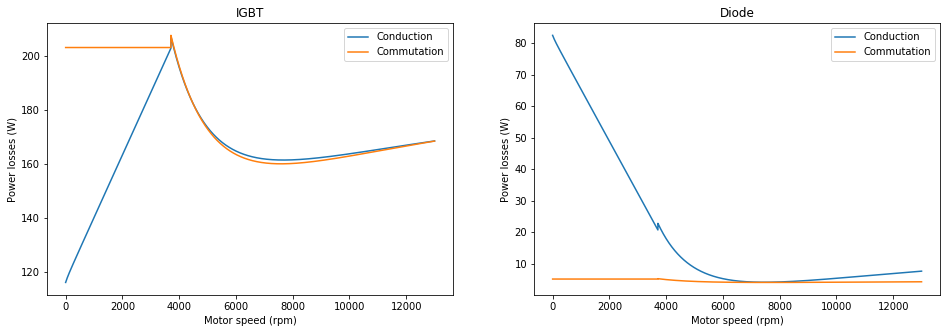

In [8]:
### Power losses
list_P_IGBT_cond  = []
list_P_IGBT_com   = []
list_P_Diode_cond = []
list_P_Diode_com  = []

for i in range(len(list_Ωrpm)) :
    I = list_I[i]   #[A] motor current
    φ = list_φ[i]   #[rad] phase shift between U and I
    V = list_V[i]   #[V] motor voltage
    mi = 2*V/Udc    #[] modulation index
    
    #IGBT losses
    P_IGBT_cond  = 1/2*(Vceo*I/π + Rceo*I**2/4) + mi*m.cos(φ)*(Vceo*I/8 + Rceo*I**2/(3*π)) 
    P_IGBT_com   = f/π*(Eon+Eoff)*(Udc/Vce_ref)*(I/I_ref)
    list_P_IGBT_cond.append(P_IGBT_cond)
    list_P_IGBT_com.append(P_IGBT_com)

    #Diode losses
    P_Diode_cond = 1/2*(Vfo*I/π + Rfo*I**2/4) - mi*m.cos(φ)*(Vfo*I/8 + Rfo*I**2/(3*π))
    P_Diode_com  = f/π*Qrr/4*Udc*I/I_ref
    list_P_Diode_cond.append(P_Diode_cond)
    list_P_Diode_com.append(P_Diode_com)
    
    
plt.figure()
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.plot(list_Ωrpm, list_P_IGBT_cond, label="Conduction")
plt.plot(list_Ωrpm, list_P_IGBT_com, label="Commutation")
plt.xlabel("Motor speed (rpm)")
plt.ylabel("Power losses (W)")
plt.title("IGBT")
plt.legend() 

plt.subplot(122)
plt.plot(list_Ωrpm, list_P_Diode_cond, label="Conduction")
plt.plot(list_Ωrpm, list_P_Diode_com, label="Commutation")
plt.xlabel("Motor speed (rpm)")
plt.ylabel("Power losses (W)")
plt.title("Diode")
plt.legend() 

print(list)

|  | IGBT conduction | IGBT commutation | IGBT tot | Diode conduction | Diode commutation | Diode tot | Inverter tot |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Power losses (W) | 203 | 203 | 406 | 20 | 5 | 25 | 2586 |